# MÉTODO DE ENTRADA DE FECHA

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

### En este método el objetivo será pasarle de entrada sólo la fecha transformada y predecir el valor correspondiente a dicha fecha 

In [2]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from array import *
from pickle import dump
import math

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
np.random.seed(123)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
FILEPATH = "../../datasources/THC-id-17.csv"
df_original = pd.read_csv(FILEPATH, parse_dates=True)

FILEPATH = "../../datasources/THC-id-17-preprocessed.csv"
df = pd.read_csv(FILEPATH, parse_dates=True)

In [4]:
df_original

,datetime,id,value
0,2019-01-01 03:00:00,17.0,0.087
1,2019-01-01 03:15:00,17.0,0.100
2,2019-01-01 03:30:00,17.0,0.084
3,2019-01-01 03:45:00,17.0,0.057
4,2019-01-01 04:00:00,17.0,0.167
...,...,...,...
64588,2020-11-03 22:00:00,17.0,0.031
64589,2020-11-03 22:15:00,17.0,0.055
64590,2020-11-03 22:30:00,17.0,0.019
64591,2020-11-03 22:45:00,17.0,0.021


In [5]:
df

,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,value
0,0.707107,0.707107,-0.993712,-0.111964,0.004172,0.999991,0.087
1,0.751840,0.659346,-0.994716,-0.102669,0.004351,0.999991,0.100
2,0.793353,0.608761,-0.995632,-0.093364,0.004530,0.999990,0.084
3,0.831470,0.555570,-0.996461,-0.084051,0.004709,0.999989,0.057
4,0.866025,0.500000,-0.997204,-0.074730,0.004888,0.999988,0.167
...,...,...,...,...,...,...,...
64588,-0.500000,0.866025,-0.826239,0.563320,-0.835100,0.550099,0.031
64589,-0.442289,0.896873,-0.820936,0.571021,-0.835001,0.550248,0.055
64590,-0.382683,0.923880,-0.815561,0.578671,-0.834902,0.550398,0.019
64591,-0.321439,0.946930,-0.810115,0.586271,-0.834804,0.550548,0.021


In [6]:
df.iloc[34975]

day_sin     0.321439
day_cos    -0.946930
week_sin   -0.984262
week_cos    0.176717
year_sin   -0.011647
year_cos    0.999932
value       0.039000
Name: 34975, dtype: float64

### Separado de características y etiquetas

In [7]:
features = df.iloc[:,:-1]
labels = np.ravel(df['value'])

In [8]:
features

,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos
0,0.707107,0.707107,-0.993712,-0.111964,0.004172,0.999991
1,0.751840,0.659346,-0.994716,-0.102669,0.004351,0.999991
2,0.793353,0.608761,-0.995632,-0.093364,0.004530,0.999990
3,0.831470,0.555570,-0.996461,-0.084051,0.004709,0.999989
4,0.866025,0.500000,-0.997204,-0.074730,0.004888,0.999988
...,...,...,...,...,...,...
64588,-0.500000,0.866025,-0.826239,0.563320,-0.835100,0.550099
64589,-0.442289,0.896873,-0.820936,0.571021,-0.835001,0.550248
64590,-0.382683,0.923880,-0.815561,0.578671,-0.834902,0.550398
64591,-0.321439,0.946930,-0.810115,0.586271,-0.834804,0.550548


In [9]:
labels

array([0.087, 0.1  , 0.084, ..., 0.019, 0.021, 0.052])

### División de los datos

In [10]:
data_trainX, auxX, data_trainY, auxY = train_test_split(features, labels, test_size=0.3, shuffle=False)
data_testX, data_valX, data_testY, data_valY = train_test_split(auxX, auxY, test_size=0.5, shuffle=False)

In [11]:
data_trainX

,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos
0,0.707107,0.707107,-0.993712,-0.111964,0.004172,0.999991
1,0.751840,0.659346,-0.994716,-0.102669,0.004351,0.999991
2,0.793353,0.608761,-0.995632,-0.093364,0.004530,0.999990
3,0.831470,0.555570,-0.996461,-0.084051,0.004709,0.999989
4,0.866025,0.500000,-0.997204,-0.074730,0.004888,0.999988
...,...,...,...,...,...,...
45210,0.382683,0.923880,0.056070,0.998427,0.968510,-0.248976
45211,0.442289,0.896873,0.065403,0.997859,0.968465,-0.249150
45212,0.500000,0.866025,0.074730,0.997204,0.968420,-0.249323
45213,0.555570,0.831470,0.084051,0.996461,0.968376,-0.249497


In [12]:
data_trainY

array([0.087, 0.1  , 0.084, ..., 0.017, 0.046, 0.018])

In [13]:
data_testX

,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos
45215,6.593458e-01,0.751840,0.102669,0.994716,0.968286,-0.249844
45216,7.071068e-01,0.707107,0.111964,0.993712,0.968241,-0.250017
45217,7.518398e-01,0.659346,0.121251,0.992622,0.968197,-0.250191
45218,7.933533e-01,0.608761,0.130526,0.991445,0.968152,-0.250364
45219,8.314696e-01,0.555570,0.139790,0.990181,0.968107,-0.250538
...,...,...,...,...,...,...
54899,-6.540313e-02,0.997859,0.442289,-0.896873,-0.405068,-0.914287
54900,-5.539676e-12,1.000000,0.433884,-0.900969,-0.405231,-0.914214
54901,6.540313e-02,0.997859,0.425441,-0.904986,-0.405395,-0.914142
54902,1.305262e-01,0.991445,0.416961,-0.908924,-0.405559,-0.914069


In [14]:
data_testY

array([0.016, 0.046, 0.009, ..., 0.038, 0.039, 0.018])

In [15]:
data_valX

,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos
54904,0.258819,0.965926,0.399892,-0.916562,-0.405887,-0.913923
54905,0.321439,0.946930,0.391305,-0.920261,-0.406050,-0.913851
54906,0.382683,0.923880,0.382683,-0.923880,-0.406214,-0.913778
54907,0.442289,0.896873,0.374029,-0.927417,-0.406378,-0.913705
54908,0.500000,0.866025,0.365341,-0.930874,-0.406541,-0.913632
...,...,...,...,...,...,...
64588,-0.500000,0.866025,-0.826239,0.563320,-0.835100,0.550099
64589,-0.442289,0.896873,-0.820936,0.571021,-0.835001,0.550248
64590,-0.382683,0.923880,-0.815561,0.578671,-0.834902,0.550398
64591,-0.321439,0.946930,-0.810115,0.586271,-0.834804,0.550548


In [16]:
data_valY

array([0.018, 0.017, 0.018, ..., 0.019, 0.021, 0.052])

### Cambiar la forma de la salida a (length, 1) y preparar una entrada de 3 dimensiones para posteriores modelos

In [17]:
data_trainX_3D = np.array(data_trainX).reshape(data_trainX.shape[0], 1, data_trainX.shape[1])
data_testX_3D = np.array(data_testX).reshape(data_testX.shape[0], 1, data_testX.shape[1])
data_valX_3D = np.array(data_valX).reshape(data_valX.shape[0], 1, data_valX.shape[1])

In [18]:
data_trainY = data_trainY.reshape(data_trainY.shape[0], 1)
data_testY = data_testY.reshape(data_testY.shape[0], 1)
data_valY = data_valY.reshape(data_valY.shape[0], 1)

### Normalizado de datos

#### En este caso no se va a normalizar la entrada ya que los valores corresponden a valores entre -1 y 1

### Funciones auxiliares

In [19]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim(bottom=0)
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()

In [20]:
def plot_predictions_values(index_min, real_outputs, pred_outputs, max_plots):
    plt.figure()
    plt.xlabel('Time')
    plt.ylabel(f'Valores de prediccion')
    plt.plot(np.array(real_outputs[0 : max_plots]), color='b', zorder=1, label='Real')
    plt.plot(np.array(pred_outputs[0 : max_plots]), color='r', zorder=1, label='Prediction')
    plt.xticks(rotation = 90)
    plt.legend()
    plt.show()

In [21]:
import tensorflow.keras.backend as K

def smape(y_true, y_pred):
    return K.mean(2*K.abs(y_pred-y_true)/(K.abs(y_true)+K.abs(y_pred)))

## Parámetros
####  En este caso vamos a generar una ventana de 48 valores de entrada que corresponde a las 12 horas anteriores y una salida de 4 valores que corresponden al consumo de la siguiente hora

In [22]:
###### PARAMETERS ######
n_epochs = 200
batch_size = 64
n_entrada = 1
n_predicciones = 1
n_features = data_trainX.shape[1]   
########################

### Early stopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

# MODELO 0: DENSE

### Construimos el modelo

In [24]:
def build_model0():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=n_features, name='input'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(n_predicciones)
    ])

    optimizer = tf.keras.optimizers.Adam()

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse', smape])

    return model

In [25]:
model0 = build_model0()
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 108,801
Trainable params: 108,801
Non-trainable params: 0
_________________________________________________________________


2022-06-24 02:38:13.379840: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-24 02:38:13.985439: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 29617 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:d7:00.0, compute capability: 7.0


### Entrenamiento del modelo

In [26]:
history0 = model0.fit(data_trainX, data_trainY, epochs=n_epochs, batch_size = batch_size, 
                    validation_data=(data_valX, data_valY), verbose = 1, callbacks=[early_stop])

Epoch 1/200
707/707 [==============================] - 6s 7ms/step - loss: 0.0058 - mae: 0.0453 - mse: 0.0058 - smape: 0.8037 - val_loss: 0.0066 - val_mae: 0.0452 - val_mse: 0.0066 - val_smape: 0.7543
Epoch 2/200
707/707 [==============================] - 5s 7ms/step - loss: 0.0055 - mae: 0.0433 - mse: 0.0055 - smape: 0.7747 - val_loss: 0.0065 - val_mae: 0.0418 - val_mse: 0.0065 - val_smape: 0.7241
Epoch 3/200
707/707 [==============================] - 5s 7ms/step - loss: 0.0054 - mae: 0.0426 - mse: 0.0054 - smape: 0.7634 - val_loss: 0.0071 - val_mae: 0.0477 - val_mse: 0.0071 - val_smape: 0.8051
Epoch 4/200
707/707 [==============================] - 5s 7ms/step - loss: 0.0053 - mae: 0.0425 - mse: 0.0053 - smape: 0.7578 - val_loss: 0.0068 - val_mae: 0.0452 - val_mse: 0.0068 - val_smape: 0.8019
Epoch 5/200
707/707 [==============================] - 5s 6ms/step - loss: 0.0053 - mae: 0.0423 - mse: 0.0053 - smape: 0.7540 - val_loss: 0.0068 - val_mae: 0.0451 - val_mse: 0.0068 - val_smape: 0.

Epoch 82/200
707/707 [==============================] - 5s 6ms/step - loss: 0.0044 - mae: 0.0383 - mse: 0.0044 - smape: 0.7152 - val_loss: 0.0082 - val_mae: 0.0479 - val_mse: 0.0082 - val_smape: 0.8053
Epoch 83/200
707/707 [==============================] - 5s 7ms/step - loss: 0.0044 - mae: 0.0383 - mse: 0.0044 - smape: 0.7155 - val_loss: 0.0085 - val_mae: 0.0488 - val_mse: 0.0085 - val_smape: 0.8004
Epoch 84/200
707/707 [==============================] - 5s 6ms/step - loss: 0.0044 - mae: 0.0382 - mse: 0.0044 - smape: 0.7140 - val_loss: 0.0088 - val_mae: 0.0490 - val_mse: 0.0088 - val_smape: 0.7982
Epoch 85/200
707/707 [==============================] - 4s 6ms/step - loss: 0.0044 - mae: 0.0381 - mse: 0.0044 - smape: 0.7144 - val_loss: 0.0089 - val_mae: 0.0501 - val_mse: 0.0089 - val_smape: 0.7945
Epoch 86/200
707/707 [==============================] - 4s 6ms/step - loss: 0.0044 - mae: 0.0382 - mse: 0.0044 - smape: 0.7150 - val_loss: 0.0080 - val_mae: 0.0455 - val_mse: 0.0080 - val_smap

In [27]:
hist0 = pd.DataFrame(history0.history)
hist0['epoch'] = history0.epoch
hist0

,loss,mae,mse,smape,val_loss,val_mae,val_mse,val_smape,epoch
0,0.005835,0.045277,0.005835,0.803734,0.006626,0.045158,0.006626,0.754347,0
1,0.005478,0.043330,0.005478,0.774736,0.006475,0.041776,0.006475,0.724127,1
2,0.005354,0.042647,0.005354,0.763376,0.007079,0.047727,0.007079,0.805108,2
3,0.005319,0.042500,0.005319,0.757816,0.006794,0.045187,0.006794,0.801908,3
4,0.005292,0.042292,0.005292,0.753969,0.006779,0.045142,0.006779,0.791368,4
...,...,...,...,...,...,...,...,...,...
97,0.004245,0.037779,0.004245,0.711420,0.008376,0.045615,0.008376,0.757503,97
98,0.004284,0.037840,0.004284,0.711090,0.008044,0.046003,0.008044,0.765261,98
99,0.004252,0.037753,0.004252,0.711507,0.008948,0.048683,0.008948,0.759574,99
100,0.004264,0.037883,0.004264,0.712304,0.008485,0.047247,0.008485,0.806951,100


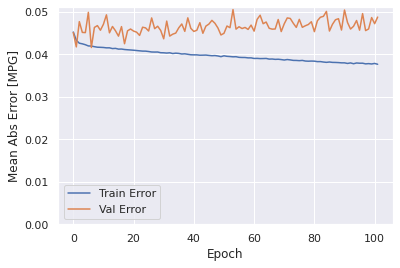

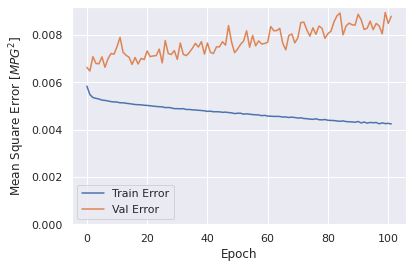

In [28]:
sns.set(rc = {'figure.figsize':(15,5), 'figure.dpi': 70})
plot_history(history0)

### Evaluar predicciones

In [29]:
score_train0 = model0.evaluate(data_trainX, data_trainY, verbose=1)
print(f'Loss:{score_train0[0]}')
print(f'MAE:{score_train0[1]}')
print(f'MSE:{score_train0[2]}')
print(f'SMAPE:{score_train0[3]}')

1413/1413 [==============================] - 6s 4ms/step - loss: 0.0041 - mae: 0.0377 - mse: 0.0041 - smape: 0.7138
Loss:0.004110836423933506
MAE:0.03769621253013611
MSE:0.004110836423933506
SMAPE:0.7138011455535889


In [30]:
score_val0 = model0.evaluate(data_valX, data_valY, verbose=1)
print(f'Loss:{score_val0[0]}')
print(f'MAE:{score_val0[1]}')
print(f'MSE:{score_val0[2]}')
print(f'SMAPE:{score_val0[3]}')

303/303 [==============================] - 1s 4ms/step - loss: 0.0088 - mae: 0.0488 - mse: 0.0088 - smape: 0.8019
Loss:0.008788234554231167
MAE:0.048798173666000366
MSE:0.008788234554231167
SMAPE:0.8019334077835083


In [31]:
score_test0 = model0.evaluate(data_testX, data_testY, verbose=1)
print(f'Loss:{score_test0[0]}')
print(f'MAE:{score_test0[1]}')
print(f'MSE:{score_test0[2]}')
print(f'SMAPE:{score_test0[3]}')

303/303 [==============================] - 1s 4ms/step - loss: 0.0071 - mae: 0.0480 - mse: 0.0071 - smape: 0.7824
Loss:0.007103334181010723
MAE:0.04797383397817612
MSE:0.007103334181010723
SMAPE:0.7823769450187683


### Comparativa de resultados

In [32]:
result = hist0.iloc[-1]
comparativa0 = pd.DataFrame(np.array([[result['mae'], result['mse'], result['smape'], math.sqrt(result['mse'])], 
                                      [result['val_mae'], result['val_mse'], result['val_smape'], math.sqrt(result['val_mse'])],
                                      [score_test0[1], score_test0[2], score_test0[3], math.sqrt(score_test0[2])]]),
                            columns = ['MAE', 'MSE', 'SMAPE', 'RMSE'],
                            index = ['ENTRENAMIENTO', 'VALIDACION', 'TEST'])

comparativa0.style.set_caption("Método de sólo fecha - Denso")

,MAE,MSE,SMAPE,RMSE
ENTRENAMIENTO,0.037686,0.004238,0.710586,0.065101
VALIDACION,0.048798,0.008788,0.801806,0.093746
TEST,0.047974,0.007103,0.782377,0.084281


### Obtener predicciones

In [33]:
trainPredict0 = model0.predict(data_trainX)
testPredict0 = model0.predict(data_testX)

### Calcular RMSE

In [34]:
trainScore0 = math.sqrt(mean_squared_error(data_trainY, trainPredict0))
print(f'Train predict RMSE:{trainScore0}')
testScore0 = math.sqrt(mean_squared_error(data_testY, testPredict0))
print(f'Test predict RMSE:{testScore0}')

Train predict RMSE:0.06411580040554561
Test predict RMSE:0.08428126993294065


### Visualización de las predicciones

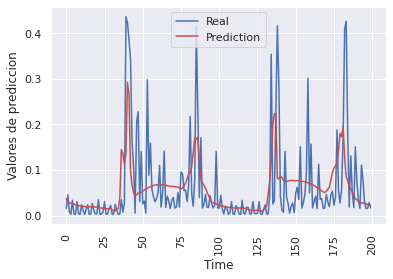

In [35]:
plot_predictions_values(int(data_testX.iloc[0].name), data_testY, testPredict0, 200)

# MODELO 1: LSTM DE UNA CAPA

### Construimos el modelo

In [36]:
def build_model1():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(100, activation='tanh', input_shape=(n_entrada, n_features)),
        tf.keras.layers.Dense(n_predicciones)
    ])

    optimizer = tf.keras.optimizers.Adam()

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse', smape])

    return model

In [37]:
model1 = build_model1()
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42800     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 42,901
Trainable params: 42,901
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento del modelo

In [38]:
history1 = model1.fit(data_trainX_3D, data_trainY, epochs=n_epochs, batch_size = batch_size, 
                    validation_data=(data_valX_3D, data_valY), verbose = 1, callbacks=[early_stop])

Epoch 1/200


2022-06-24 02:46:11.916139: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8100


707/707 [==============================] - 8s 9ms/step - loss: 0.0062 - mae: 0.0475 - mse: 0.0062 - smape: 0.8517 - val_loss: 0.0065 - val_mae: 0.0467 - val_mse: 0.0065 - val_smape: 0.8806
Epoch 2/200
707/707 [==============================] - 6s 8ms/step - loss: 0.0061 - mae: 0.0475 - mse: 0.0061 - smape: 0.8670 - val_loss: 0.0065 - val_mae: 0.0448 - val_mse: 0.0065 - val_smape: 0.9055
Epoch 3/200
707/707 [==============================] - 6s 8ms/step - loss: 0.0061 - mae: 0.0475 - mse: 0.0061 - smape: 0.8685 - val_loss: 0.0065 - val_mae: 0.0476 - val_mse: 0.0065 - val_smape: 0.9181
Epoch 4/200
707/707 [==============================] - 6s 8ms/step - loss: 0.0061 - mae: 0.0475 - mse: 0.0061 - smape: 0.8644 - val_loss: 0.0065 - val_mae: 0.0490 - val_mse: 0.0065 - val_smape: 0.9267
Epoch 5/200
707/707 [==============================] - 6s 8ms/step - loss: 0.0061 - mae: 0.0472 - mse: 0.0061 - smape: 0.8593 - val_loss: 0.0068 - val_mae: 0.0558 - val_mse: 0.0068 - val_smape: 0.9277
Epoch 6

Epoch 42/200
707/707 [==============================] - 6s 8ms/step - loss: 0.0054 - mae: 0.0428 - mse: 0.0054 - smape: 0.7551 - val_loss: 0.0066 - val_mae: 0.0448 - val_mse: 0.0066 - val_smape: 0.7625
Epoch 43/200
707/707 [==============================] - 6s 8ms/step - loss: 0.0054 - mae: 0.0428 - mse: 0.0054 - smape: 0.7549 - val_loss: 0.0067 - val_mae: 0.0461 - val_mse: 0.0067 - val_smape: 0.8147
Epoch 44/200
707/707 [==============================] - 6s 8ms/step - loss: 0.0054 - mae: 0.0427 - mse: 0.0054 - smape: 0.7536 - val_loss: 0.0067 - val_mae: 0.0455 - val_mse: 0.0067 - val_smape: 0.7788
Epoch 45/200
707/707 [==============================] - 6s 8ms/step - loss: 0.0054 - mae: 0.0428 - mse: 0.0054 - smape: 0.7547 - val_loss: 0.0067 - val_mae: 0.0458 - val_mse: 0.0067 - val_smape: 0.7833
Epoch 46/200
707/707 [==============================] - 6s 8ms/step - loss: 0.0054 - mae: 0.0427 - mse: 0.0054 - smape: 0.7534 - val_loss: 0.0067 - val_mae: 0.0467 - val_mse: 0.0067 - val_smap

In [39]:
hist1 = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch
hist1

,loss,mae,mse,smape,val_loss,val_mae,val_mse,val_smape,epoch
0,0.006238,0.047531,0.006238,0.851685,0.006530,0.046675,0.006530,0.880647,0
1,0.006119,0.047529,0.006119,0.866957,0.006514,0.044779,0.006514,0.905467,1
2,0.006105,0.047549,0.006105,0.868491,0.006503,0.047605,0.006503,0.918091,2
3,0.006099,0.047482,0.006099,0.864430,0.006507,0.048990,0.006507,0.926716,3
4,0.006083,0.047224,0.006083,0.859251,0.006814,0.055834,0.006814,0.927655,4
...,...,...,...,...,...,...,...,...,...
107,0.005245,0.042072,0.005245,0.748044,0.006904,0.047635,0.006904,0.778886,107
108,0.005244,0.042117,0.005244,0.748587,0.006899,0.045331,0.006899,0.776208,108
109,0.005241,0.042061,0.005241,0.747802,0.006860,0.045510,0.006860,0.786364,109
110,0.005246,0.042098,0.005246,0.748297,0.006936,0.046357,0.006936,0.815904,110


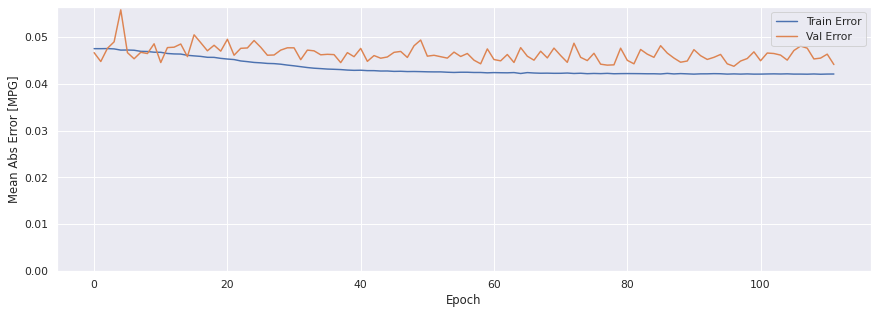

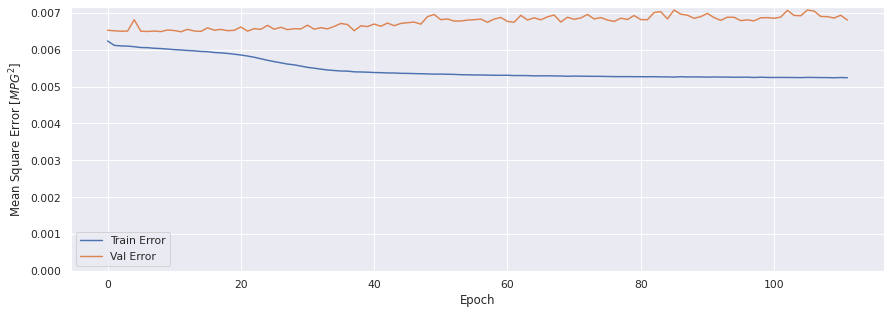

In [40]:
sns.set(rc = {'figure.figsize':(15,5), 'figure.dpi':70})
plot_history(history1)

### Evaluar predicciones

In [41]:
score_train1 = model1.evaluate(data_trainX_3D, data_trainY, verbose=1)
print(f'Loss:{score_train1[0]}')
print(f'MAE:{score_train1[1]}')
print(f'MSE:{score_train1[2]}')
print(f'SMAPE:{score_train1[3]}')

1413/1413 [==============================] - 6s 4ms/step - loss: 0.0052 - mae: 0.0410 - mse: 0.0052 - smape: 0.7377
Loss:0.005234072916209698
MAE:0.040960103273391724
MSE:0.005234072916209698
SMAPE:0.7376911044120789


In [42]:
score_val1 = model1.evaluate(data_valX_3D, data_valY, verbose=1)
print(f'Loss:{score_val1[0]}')
print(f'MAE:{score_val1[1]}')
print(f'MSE:{score_val1[2]}')
print(f'SMAPE:{score_val1[3]}')

303/303 [==============================] - 1s 5ms/step - loss: 0.0068 - mae: 0.0441 - mse: 0.0068 - smape: 0.7630
Loss:0.0068051922135055065
MAE:0.04413295537233353
MSE:0.0068051922135055065
SMAPE:0.7629532217979431


In [43]:
score_test1 = model1.evaluate(data_testX_3D, data_testY, verbose=1)
print(f'Loss:{score_test1[0]}')
print(f'MAE:{score_test1[1]}')
print(f'MSE:{score_test1[2]}')
print(f'SMAPE:{score_test1[3]}')

303/303 [==============================] - 1s 5ms/step - loss: 0.0063 - mae: 0.0458 - mse: 0.0063 - smape: 0.7536
Loss:0.006290841847658157
MAE:0.04575953260064125
MSE:0.006290841847658157
SMAPE:0.7535900473594666


### Comparativa de resultados

In [44]:
result = hist1.iloc[-1]
comparativa1 = pd.DataFrame(np.array([[result['mae'], result['mse'], result['smape'], math.sqrt(result['mse'])], 
                                      [result['val_mae'], result['val_mse'], result['val_smape'], math.sqrt(result['val_mse'])],
                                      [score_test1[1], score_test1[2], score_test1[3], math.sqrt(score_test1[2])]]),
                            columns = ['MAE', 'MSE', 'SMAPE', 'RMSE'],
                            index = ['ENTRENAMIENTO', 'VALIDACION', 'TEST'])

comparativa1.style.set_caption("Método de sólo fecha - LSTM de una capa")

,MAE,MSE,SMAPE,RMSE
ENTRENAMIENTO,0.042109,0.005241,0.747734,0.072398
VALIDACION,0.044133,0.006805,0.762428,0.082494
TEST,0.045760,0.006291,0.753590,0.079315


### Obtener predicciones

In [45]:
trainPredict1 = model1.predict(data_trainX_3D)
testPredict1 = model1.predict(data_testX_3D)

### Calcular RMSE

In [46]:
trainScore1 = math.sqrt(mean_squared_error(data_trainY, trainPredict1))
print(f'Train predict RMSE:{trainScore1}')
testScore1 = math.sqrt(mean_squared_error(data_testY, testPredict1))
print(f'Test predict RMSE:{testScore1}')

Train predict RMSE:0.07234689910227504
Test predict RMSE:0.07931480909322058


### Visualización de las predicciones

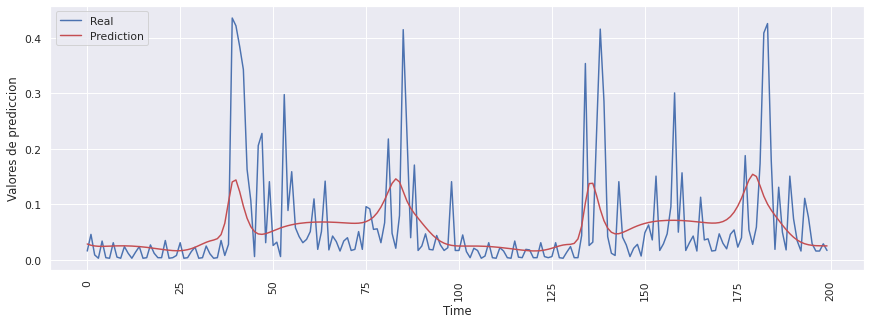

In [47]:
plot_predictions_values(int(data_testX.iloc[0].name), data_testY, testPredict1, 200)

# MODELO 2: LSTM DE DOS CAPAS

### Construimos el modelo

In [48]:
def build_model2():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(200, activation='tanh', return_sequences = True, input_shape=(n_entrada, n_features)),
        tf.keras.layers.LSTM(200, activation='tanh'),
        tf.keras.layers.Dense(n_predicciones)
    ])

    optimizer = tf.keras.optimizers.Adam()

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse', smape])

    return model

In [49]:
model2 = build_model2()
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1, 200)            165600    
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dense_6 (Dense)             (None, 1)                 201       
                                                                 
Total params: 486,601
Trainable params: 486,601
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento del modelo

In [51]:
history2 = model2.fit(data_trainX_3D, data_trainY, epochs=n_epochs, batch_size = batch_size, 
                    validation_data=(data_valX_3D, data_valY), verbose = 1, callbacks=[early_stop])

Epoch 1/200
707/707 [==============================] - 10s 12ms/step - loss: 0.0063 - mae: 0.0473 - mse: 0.0063 - smape: 0.8413 - val_loss: 0.0065 - val_mae: 0.0440 - val_mse: 0.0065 - val_smape: 0.8149
Epoch 2/200
707/707 [==============================] - 8s 11ms/step - loss: 0.0061 - mae: 0.0471 - mse: 0.0061 - smape: 0.8508 - val_loss: 0.0065 - val_mae: 0.0480 - val_mse: 0.0065 - val_smape: 0.9107
Epoch 3/200
707/707 [==============================] - 8s 11ms/step - loss: 0.0060 - mae: 0.0465 - mse: 0.0060 - smape: 0.8244 - val_loss: 0.0066 - val_mae: 0.0512 - val_mse: 0.0066 - val_smape: 0.8862
Epoch 4/200
707/707 [==============================] - 8s 11ms/step - loss: 0.0059 - mae: 0.0458 - mse: 0.0059 - smape: 0.7935 - val_loss: 0.0065 - val_mae: 0.0458 - val_mse: 0.0065 - val_smape: 0.8717
Epoch 5/200
707/707 [==============================] - 8s 11ms/step - loss: 0.0058 - mae: 0.0450 - mse: 0.0058 - smape: 0.7781 - val_loss: 0.0065 - val_mae: 0.0474 - val_mse: 0.0065 - val_sma

707/707 [==============================] - 8s 11ms/step - loss: 0.0052 - mae: 0.0416 - mse: 0.0052 - smape: 0.7444 - val_loss: 0.0068 - val_mae: 0.0426 - val_mse: 0.0068 - val_smape: 0.7522
Epoch 42/200
707/707 [==============================] - 8s 11ms/step - loss: 0.0052 - mae: 0.0417 - mse: 0.0052 - smape: 0.7463 - val_loss: 0.0071 - val_mae: 0.0436 - val_mse: 0.0071 - val_smape: 0.7659
Epoch 43/200
707/707 [==============================] - 8s 11ms/step - loss: 0.0052 - mae: 0.0416 - mse: 0.0052 - smape: 0.7451 - val_loss: 0.0072 - val_mae: 0.0470 - val_mse: 0.0072 - val_smape: 0.7911
Epoch 44/200
707/707 [==============================] - 8s 11ms/step - loss: 0.0052 - mae: 0.0416 - mse: 0.0052 - smape: 0.7453 - val_loss: 0.0069 - val_mae: 0.0428 - val_mse: 0.0069 - val_smape: 0.7395
Epoch 45/200
707/707 [==============================] - 8s 11ms/step - loss: 0.0051 - mae: 0.0416 - mse: 0.0051 - smape: 0.7446 - val_loss: 0.0071 - val_mae: 0.0477 - val_mse: 0.0071 - val_smape: 0.815

707/707 [==============================] - 8s 11ms/step - loss: 0.0051 - mae: 0.0413 - mse: 0.0051 - smape: 0.7416 - val_loss: 0.0072 - val_mae: 0.0466 - val_mse: 0.0072 - val_smape: 0.7975
Epoch 82/200
707/707 [==============================] - 8s 11ms/step - loss: 0.0050 - mae: 0.0412 - mse: 0.0050 - smape: 0.7416 - val_loss: 0.0070 - val_mae: 0.0474 - val_mse: 0.0070 - val_smape: 0.8236
Epoch 83/200
707/707 [==============================] - 8s 11ms/step - loss: 0.0051 - mae: 0.0412 - mse: 0.0051 - smape: 0.7416 - val_loss: 0.0072 - val_mae: 0.0450 - val_mse: 0.0072 - val_smape: 0.7756
Epoch 84/200
707/707 [==============================] - 8s 11ms/step - loss: 0.0050 - mae: 0.0412 - mse: 0.0050 - smape: 0.7412 - val_loss: 0.0071 - val_mae: 0.0460 - val_mse: 0.0071 - val_smape: 0.7862
Epoch 85/200
707/707 [==============================] - 8s 11ms/step - loss: 0.0050 - mae: 0.0411 - mse: 0.0050 - smape: 0.7410 - val_loss: 0.0071 - val_mae: 0.0468 - val_mse: 0.0071 - val_smape: 0.776

In [52]:
hist2 = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch
hist2

,loss,mae,mse,smape,val_loss,val_mae,val_mse,val_smape,epoch
0,0.006299,0.047299,0.006299,0.841305,0.006480,0.044004,0.006480,0.814903,0
1,0.006077,0.047106,0.006077,0.850803,0.006521,0.047977,0.006521,0.910723,1
2,0.006013,0.046525,0.006013,0.824387,0.006622,0.051242,0.006622,0.886219,2
3,0.005938,0.045798,0.005938,0.793523,0.006505,0.045752,0.006505,0.871742,3
4,0.005819,0.045038,0.005819,0.778136,0.006453,0.047368,0.006453,0.823370,4
...,...,...,...,...,...,...,...,...,...
100,0.004984,0.040965,0.004984,0.739961,0.007424,0.048440,0.007424,0.796395,100
101,0.004983,0.040963,0.004983,0.740140,0.007537,0.046596,0.007537,0.779955,101
102,0.004979,0.040916,0.004979,0.739841,0.007366,0.045944,0.007366,0.786092,102
103,0.004982,0.040907,0.004982,0.740162,0.007130,0.045743,0.007130,0.793131,103


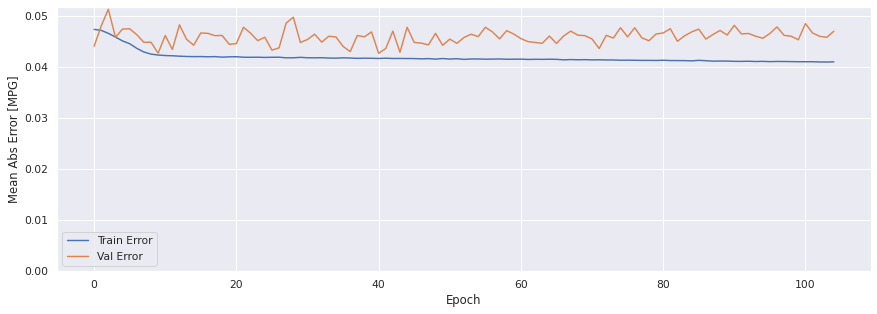

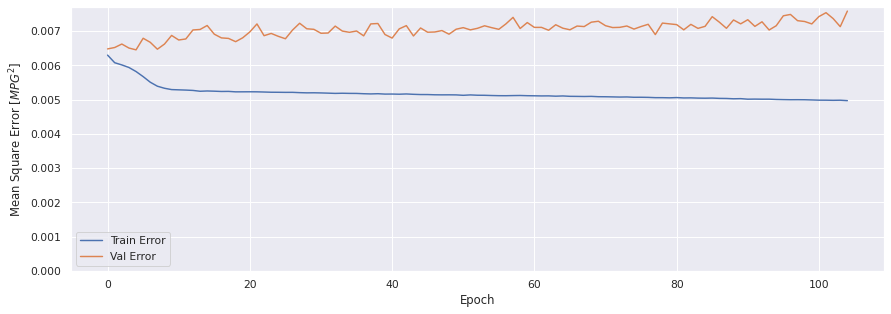

In [53]:
sns.set(rc = {'figure.figsize':(15,5)})
plot_history(history2)

### Evaluar predicciones

In [54]:
score_train2 = model2.evaluate(data_trainX_3D, data_trainY, verbose=1)
print(f'Loss:{score_train2[0]}')
print(f'MAE:{score_train2[1]}')
print(f'MSE:{score_train2[2]}')
print(f'SMAPE:{score_train2[3]}')

1413/1413 [==============================] - 7s 5ms/step - loss: 0.0049 - mae: 0.0408 - mse: 0.0049 - smape: 0.7372
Loss:0.00494719110429287
MAE:0.04079616442322731
MSE:0.00494719110429287
SMAPE:0.7371987104415894


In [55]:
score_val2 = model2.evaluate(data_valX_3D, data_valY, verbose=1)
print(f'Loss:{score_val2[0]}')
print(f'MAE:{score_val2[1]}')
print(f'MSE:{score_val2[2]}')
print(f'SMAPE:{score_val2[3]}')

303/303 [==============================] - 2s 5ms/step - loss: 0.0076 - mae: 0.0469 - mse: 0.0076 - smape: 0.7772
Loss:0.007583681959658861
MAE:0.04694650322198868
MSE:0.007583681959658861
SMAPE:0.7772484421730042


In [56]:
score_test2 = model2.evaluate(data_testX_3D, data_testY, verbose=1)
print(f'Loss:{score_test2[0]}')
print(f'MAE:{score_test2[1]}')
print(f'MSE:{score_test2[2]}')
print(f'SMAPE:{score_test2[3]}')

303/303 [==============================] - 2s 5ms/step - loss: 0.0067 - mae: 0.0459 - mse: 0.0067 - smape: 0.7475
Loss:0.006677050143480301
MAE:0.045906662940979004
MSE:0.006677050143480301
SMAPE:0.7474780082702637


### Comparativa de resultados

In [57]:
result = hist2.iloc[-1]
comparativa2 = pd.DataFrame(np.array([[result['mae'], result['mse'], result['smape'], math.sqrt(result['mse'])], 
                                      [result['val_mae'], result['val_mse'], result['val_smape'], math.sqrt(result['val_mse'])],
                                      [score_test2[1], score_test2[2], score_test2[3], math.sqrt(score_test2[2])]]),
                            columns = ['MAE', 'MSE', 'SMAPE', 'RMSE'],
                            index = ['ENTRENAMIENTO', 'VALIDACION', 'TEST'])

comparativa2.style.set_caption("Método de sólo fecha - LSTM de dos capas")

,MAE,MSE,SMAPE,RMSE
ENTRENAMIENTO,0.040948,0.004970,0.740092,0.070495
VALIDACION,0.046946,0.007584,0.776699,0.087084
TEST,0.045907,0.006677,0.747478,0.081713


### Obtener predicciones

In [58]:
trainPredict2 = model2.predict(data_trainX_3D)
testPredict2 = model2.predict(data_testX_3D)

In [73]:
trainScore2 = math.sqrt(mean_squared_error(data_trainY, trainPredict2))
print(f'Train predict RMSE:{trainScore2}')
testScore2 = math.sqrt(mean_squared_error(data_testY, testPredict2))
print(f'Test predict RMSE:{testScore2}')

Train predict RMSE:0.07033624306730286
Test predict RMSE:0.08171320298649395


### Visualización de las predicciones

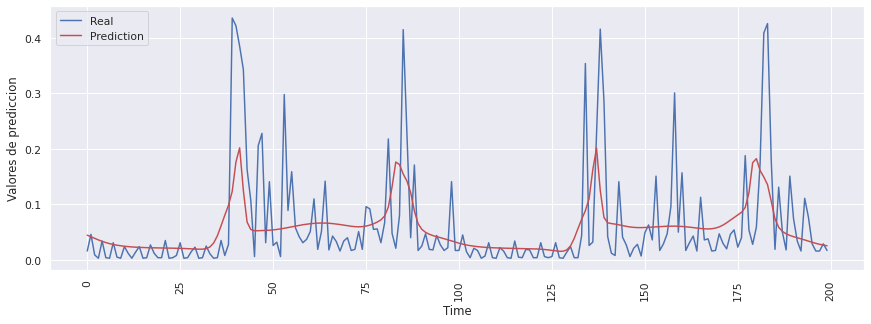

In [59]:
plot_predictions_values(int(data_testX.iloc[0].name), data_testY, testPredict2, 200)

# MODELO 3: LSTM BIDIRECCIONAL

### Construimos el modelo

In [60]:
def build_model3():
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, activation='tanh'), input_shape=(n_entrada, n_features)),
        tf.keras.layers.Dense(n_predicciones)
    ])

    optimizer = tf.keras.optimizers.Adam()

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse', smape])

    return model

In [61]:
model3 = build_model3()
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 400)              331200    
 l)                                                              
                                                                 
 dense_7 (Dense)             (None, 1)                 401       
                                                                 
Total params: 331,601
Trainable params: 331,601
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento del modelo

In [62]:
history3 = model3.fit(data_trainX_3D, data_trainY, epochs=n_epochs, batch_size = batch_size, 
                    validation_data=(data_valX_3D, data_valY), verbose = 1, callbacks=[early_stop])

Epoch 1/200
707/707 [==============================] - 10s 11ms/step - loss: 0.0063 - mae: 0.0480 - mse: 0.0063 - smape: 0.8659 - val_loss: 0.0067 - val_mae: 0.0503 - val_mse: 0.0067 - val_smape: 0.9309
Epoch 2/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0062 - mae: 0.0479 - mse: 0.0062 - smape: 0.8763 - val_loss: 0.0066 - val_mae: 0.0506 - val_mse: 0.0066 - val_smape: 0.9205
Epoch 3/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0061 - mae: 0.0477 - mse: 0.0061 - smape: 0.8689 - val_loss: 0.0065 - val_mae: 0.0496 - val_mse: 0.0065 - val_smape: 0.9559
Epoch 4/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0061 - mae: 0.0473 - mse: 0.0061 - smape: 0.8585 - val_loss: 0.0066 - val_mae: 0.0467 - val_mse: 0.0066 - val_smape: 0.8589
Epoch 5/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0061 - mae: 0.0473 - mse: 0.0061 - smape: 0.8601 - val_loss: 0.0065 - val_mae: 0.0481 - val_mse: 0.0065 - val_sma

707/707 [==============================] - 7s 10ms/step - loss: 0.0055 - mae: 0.0435 - mse: 0.0055 - smape: 0.7613 - val_loss: 0.0066 - val_mae: 0.0477 - val_mse: 0.0066 - val_smape: 0.8214
Epoch 42/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0055 - mae: 0.0435 - mse: 0.0055 - smape: 0.7600 - val_loss: 0.0066 - val_mae: 0.0478 - val_mse: 0.0066 - val_smape: 0.8345
Epoch 43/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0055 - mae: 0.0435 - mse: 0.0055 - smape: 0.7594 - val_loss: 0.0066 - val_mae: 0.0464 - val_mse: 0.0066 - val_smape: 0.8358
Epoch 44/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0055 - mae: 0.0434 - mse: 0.0055 - smape: 0.7589 - val_loss: 0.0066 - val_mae: 0.0470 - val_mse: 0.0066 - val_smape: 0.8891
Epoch 45/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0054 - mae: 0.0433 - mse: 0.0054 - smape: 0.7594 - val_loss: 0.0067 - val_mae: 0.0486 - val_mse: 0.0067 - val_smape: 0.840

707/707 [==============================] - 7s 10ms/step - loss: 0.0053 - mae: 0.0423 - mse: 0.0053 - smape: 0.7481 - val_loss: 0.0068 - val_mae: 0.0455 - val_mse: 0.0068 - val_smape: 0.7824
Epoch 82/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0053 - mae: 0.0423 - mse: 0.0053 - smape: 0.7475 - val_loss: 0.0068 - val_mae: 0.0452 - val_mse: 0.0068 - val_smape: 0.7963
Epoch 83/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0053 - mae: 0.0422 - mse: 0.0053 - smape: 0.7471 - val_loss: 0.0067 - val_mae: 0.0442 - val_mse: 0.0067 - val_smape: 0.7689
Epoch 84/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0053 - mae: 0.0422 - mse: 0.0053 - smape: 0.7481 - val_loss: 0.0068 - val_mae: 0.0447 - val_mse: 0.0068 - val_smape: 0.7903
Epoch 85/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0053 - mae: 0.0422 - mse: 0.0053 - smape: 0.7478 - val_loss: 0.0069 - val_mae: 0.0449 - val_mse: 0.0069 - val_smape: 0.764

707/707 [==============================] - 7s 10ms/step - loss: 0.0052 - mae: 0.0420 - mse: 0.0052 - smape: 0.7466 - val_loss: 0.0069 - val_mae: 0.0458 - val_mse: 0.0069 - val_smape: 0.7915
Epoch 122/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0052 - mae: 0.0419 - mse: 0.0052 - smape: 0.7459 - val_loss: 0.0069 - val_mae: 0.0466 - val_mse: 0.0069 - val_smape: 0.7922
Epoch 123/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0052 - mae: 0.0420 - mse: 0.0052 - smape: 0.7457 - val_loss: 0.0069 - val_mae: 0.0454 - val_mse: 0.0069 - val_smape: 0.7709
Epoch 124/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0052 - mae: 0.0420 - mse: 0.0052 - smape: 0.7463 - val_loss: 0.0069 - val_mae: 0.0452 - val_mse: 0.0069 - val_smape: 0.7843
Epoch 125/200
707/707 [==============================] - 7s 10ms/step - loss: 0.0052 - mae: 0.0420 - mse: 0.0052 - smape: 0.7465 - val_loss: 0.0069 - val_mae: 0.0459 - val_mse: 0.0069 - val_smape: 0

In [63]:
hist3 = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch
hist3

,loss,mae,mse,smape,val_loss,val_mae,val_mse,val_smape,epoch
0,0.006278,0.047959,0.006278,0.865894,0.006686,0.050335,0.006686,0.930876,0
1,0.006165,0.047901,0.006165,0.876336,0.006569,0.050574,0.006569,0.920455,1
2,0.006134,0.047664,0.006134,0.868855,0.006542,0.049577,0.006542,0.955940,2
3,0.006111,0.047323,0.006111,0.858493,0.006573,0.046734,0.006573,0.858914,3
4,0.006083,0.047306,0.006083,0.860144,0.006498,0.048060,0.006498,0.886899,4
...,...,...,...,...,...,...,...,...,...
122,0.005246,0.041951,0.005246,0.745727,0.006913,0.045359,0.006913,0.770873,122
123,0.005242,0.041967,0.005242,0.746330,0.006907,0.045210,0.006907,0.784350,123
124,0.005243,0.041997,0.005243,0.746463,0.006897,0.045923,0.006897,0.803387,124
125,0.005237,0.041962,0.005237,0.746456,0.007170,0.048956,0.007170,0.787703,125


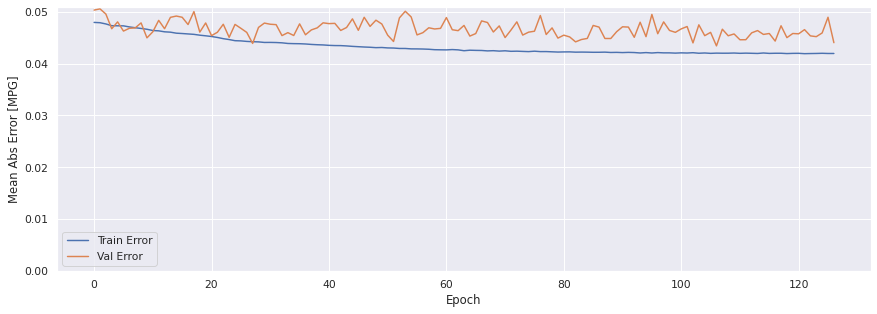

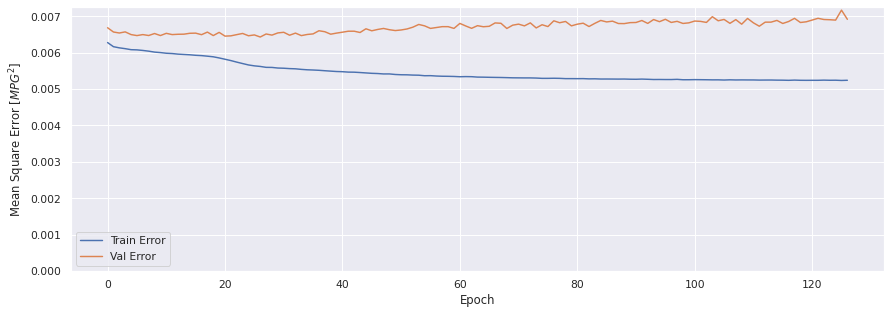

In [64]:
sns.set(rc = {'figure.figsize':(15,5)})
plot_history(history3)

### Evaluar predicciones

In [65]:
score_train3 = model3.evaluate(data_trainX_3D, data_trainY, verbose=1)
print(f'Loss:{score_train3[0]}')
print(f'MAE:{score_train3[1]}')
print(f'MSE:{score_train3[2]}')
print(f'SMAPE:{score_train3[3]}')

1413/1413 [==============================] - 8s 5ms/step - loss: 0.0052 - mae: 0.0410 - mse: 0.0052 - smape: 0.7350
Loss:0.005227156449109316
MAE:0.041032250970602036
MSE:0.005227156449109316
SMAPE:0.7349926829338074


In [66]:
score_val3 = model3.evaluate(data_valX_3D, data_valY, verbose=1)
print(f'Loss:{score_val3[0]}')
print(f'MAE:{score_val3[1]}')
print(f'MSE:{score_val3[2]}')
print(f'SMAPE:{score_val3[3]}')

303/303 [==============================] - 2s 5ms/step - loss: 0.0069 - mae: 0.0440 - mse: 0.0069 - smape: 0.7593
Loss:0.006918370258063078
MAE:0.044045425951480865
MSE:0.006918370258063078
SMAPE:0.7592622637748718


In [67]:
score_test3 = model3.evaluate(data_testX_3D, data_testY, verbose=1)
print(f'Loss:{score_test3[0]}')
print(f'MAE:{score_test3[1]}')
print(f'MSE:{score_test3[2]}')
print(f'SMAPE:{score_test3[3]}')

303/303 [==============================] - 2s 5ms/step - loss: 0.0063 - mae: 0.0459 - mse: 0.0063 - smape: 0.7554
Loss:0.006334921345114708
MAE:0.04588085412979126
MSE:0.006334921345114708
SMAPE:0.75542151927948


### Obtener predicciones

In [68]:
trainPredict3 = model3.predict(data_trainX_3D)
testPredict3 = model3.predict(data_testX_3D)

### Calcular RMSE

In [69]:
trainScore3 = math.sqrt(mean_squared_error(data_trainY, trainPredict3))
print(f'Train predict RMSE:{trainScore3}')
testScore3 = math.sqrt(mean_squared_error(data_testY, testPredict3))
print(f'Test predict RMSE:{testScore3}')

Train predict RMSE:0.0722990951109592
Test predict RMSE:0.07959221493450291


### Visualización de las predicciones

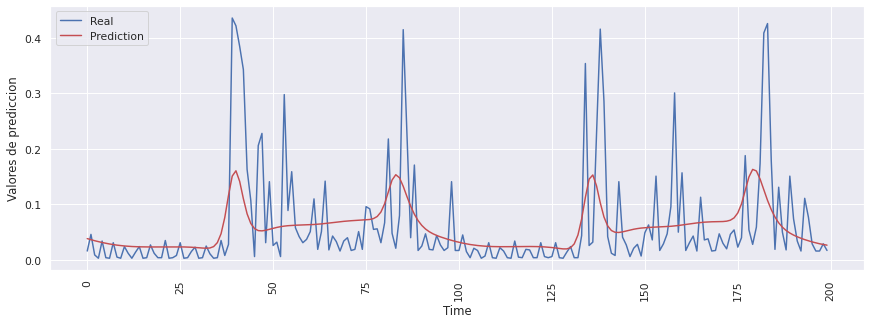

In [70]:
plot_predictions_values(int(data_testX.iloc[0].name), data_testY, testPredict3, 200)

# Comparativa de modelos

### Comparativa primeras 200 predicciones

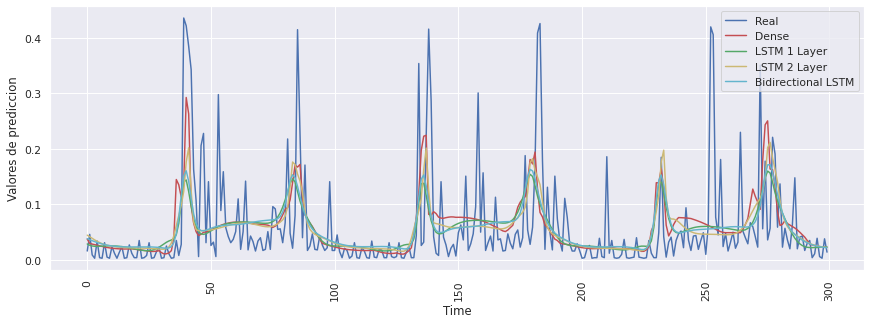

In [71]:
plt.figure()
plt.xlabel('Time')
plt.ylabel(f'Valores de prediccion')
plt.plot(np.array(data_testY[0 : 300]), color='b', zorder=1, label='Real')
plt.plot(np.array(testPredict0[0 : 300]), color='r', zorder=1, label='Dense')
plt.plot(np.array(testPredict1[0 : 300]), color='g', zorder=1, label='LSTM 1 Layer')
plt.plot(np.array(testPredict2[0 : 300]), color='y', zorder=1, label='LSTM 2 Layer')
plt.plot(np.array(testPredict3[0 : 300]), color='c', zorder=1, label='Bidirectional LSTM')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Comparativa de modelos para metódo solo fecha'}, xlabel='Modelo'>

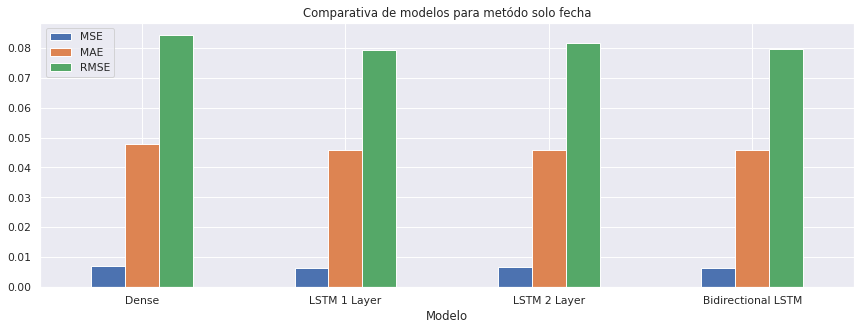

In [74]:
resultados = pd.DataFrame([['Dense', score_test0[2], score_test0[1], testScore0], 
                           ['LSTM 1 Layer', score_test1[2], score_test1[1], testScore1],
                           ['LSTM 2 Layer', score_test2[2], score_test2[1], testScore2], 
                           ['Bidirectional LSTM', score_test3[2], score_test3[1], testScore3]],
                         columns=['Modelo', 'MSE', 'MAE', 'RMSE'])

resultados.plot(x='Modelo', kind='bar', stacked=False, 
                title = 'Comparativa de modelos para metódo solo fecha', rot=0, figsize=(15,5))

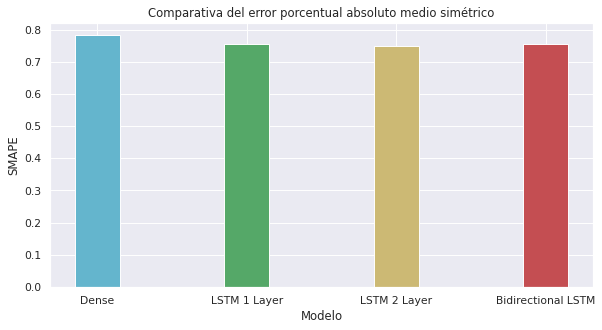

In [75]:
eje_x = ['Dense', 'LSTM 1 Layer', 'LSTM 2 Layer', 'Bidirectional LSTM']
eje_y = [score_test0[3], score_test1[3], score_test2[3], score_test3[3]]

plt.figure(figsize=(10,5))
plt.bar(eje_x, eje_y, color=['c', 'g', 'y', 'r'], width=0.3) 
plt.ylabel('SMAPE')
plt.xlabel('Modelo')
plt.title('Comparativa del error porcentual absoluto medio simétrico')
plt.show()